In [1]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_uppert_60_q2.csv").drop(
    columns=["ID", "DATE_MATCH", "TEAM_HOME", "TEAM_AWAY", "LEAGUE_INGLATERRA", "Unnamed: 0",
            "FAVOURITE_IS_HOME", "LEAGUE_ALEMANIA", "FAVOURITE_IS_AWAY", "LEAGUE_FRANCIA", "LEAGUE_ITALIA",
            "NUM_SAVESAWAY_L45", "AVG_CORNERSAWAY2_L3", "CORNERS_H_45_60", "CORNERS_DANGATTACKS_L45", "CORNERS_A",
            "TEMPERATURE", "NUM_DANGATTACKSAWAY_L45", "NUM_DANGATTACKSHOME_L45", "NUM_FOULSAWAY_L45", "NUM_ATTACKSHOME_L45",
            "NUM_TACKLEHOME_L45", "POSESSION_AWAY_L45", "IS_FAVOURITE_DRAWING", "SUM_GOALS_L60", "AVG_CORNERS_LOSE_AWAY",
            "AVG_CORNERSAWAYR2_L5", "AVG_CORNERSHOME2_L3","AVG_CORNERSHOMER2_L5","CORNERS_A_45_60","AVG_CORNERSHOME1_L3",
            "AVG_CORNERSHOME2_L5", "AVG_CORNERSAWAYR1_L3", "LEAGUE_ESPANA", "GOALS_A",
            "NUM_MATCHESAWAY_POSITIVE_L5", "NUM_SHOTSHOME_L45","WIND","RAIN"], 
    axis=1)

data = data[(data.TOTAL_CORNERS>2) &(data.TOTAL_CORNERS<9)].drop(columns=["TOTAL_CORNERS"],axis=1)

tablon = data[data.YEARMONTH<202109].drop(columns=["YEARMONTH"],axis=1)


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)].drop(columns=["YEARMONTH"],axis=1)
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111].drop(columns=["YEARMONTH"],axis=1)
y_validation_november = X_validation_november.pop("output")

In [24]:
len_test = int(round(len(tablon)*0.3, 0))
len_train = int(round(len(tablon)*0.7, 0))

In [25]:
len_test = int(round(len(tablon)*0.2, 0))
len_train = int(round(len(tablon)*0.8, 0))

X_train = tablon[len_test:]
y_train = X_train.pop("output")
X_test = tablon[:len_test]
y_test = X_test.pop("output")

In [26]:
X_train.shape, X_test.shape, X_validation.shape

((6176, 14), (2647, 14), (305, 14))

In [27]:
y_train.value_counts()

1    3945
0    2231
Name: output, dtype: int64

In [28]:
y_test.value_counts()

1    1587
0    1060
Name: output, dtype: int64

In [29]:
y_validation.value_counts()

1    181
0    124
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [30]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=130, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.56176	validation_0-logloss:0.69181	validation_0-error:0.36570
[1]	validation_0-auc:0.57011	validation_0-logloss:0.69052	validation_0-error:0.36607
[2]	validation_0-auc:0.56947	validation_0-logloss:0.68930	validation_0-error:0.36570
[3]	validation_0-auc:0.57050	validation_0-logloss:0.68828	validation_0-error:0.36834
[4]	validation_0-auc:0.56884	validation_0-logloss:0.68714	validation_0-error:0.36872
[5]	validation_0-auc:0.57278	validation_0-logloss:0.68598	validation_0-error:0.36607
[6]	validation_0-auc:0.57400	validation_0-logloss:0.68489	validation_0-error:0.36645
[7]	validation_0-auc:0.57659	validation_0-logloss:0.68382	validation_0-error:0.36721
[8]	validation_0-auc:0.57299	validation_0-logloss:0.68298	validation_0-error:0.36721
[9]	validation_0-auc:0.57393	validation_0-logloss:0.68199	validation_0-error:0.36683
[10]	validation_0-auc:0.57389	validation_0-logloss:0.68108	validation_0-error:0.36607
[11]	validation_0-auc:0.57290	validation_0-logloss:0.68019	valid

[96]	validation_0-auc:0.56635	validation_0-logloss:0.65626	validation_0-error:0.36570
[97]	validation_0-auc:0.56632	validation_0-logloss:0.65624	validation_0-error:0.36570
[98]	validation_0-auc:0.56644	validation_0-logloss:0.65617	validation_0-error:0.36570
[99]	validation_0-auc:0.56644	validation_0-logloss:0.65615	validation_0-error:0.36570
[100]	validation_0-auc:0.56600	validation_0-logloss:0.65614	validation_0-error:0.36570
[101]	validation_0-auc:0.56610	validation_0-logloss:0.65612	validation_0-error:0.36570
[102]	validation_0-auc:0.56625	validation_0-logloss:0.65609	validation_0-error:0.36570
[103]	validation_0-auc:0.56619	validation_0-logloss:0.65609	validation_0-error:0.36570
[104]	validation_0-auc:0.56675	validation_0-logloss:0.65605	validation_0-error:0.36570
[105]	validation_0-auc:0.56679	validation_0-logloss:0.65603	validation_0-error:0.36570
[106]	validation_0-auc:0.56703	validation_0-logloss:0.65599	validation_0-error:0.36570
[107]	validation_0-auc:0.56707	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

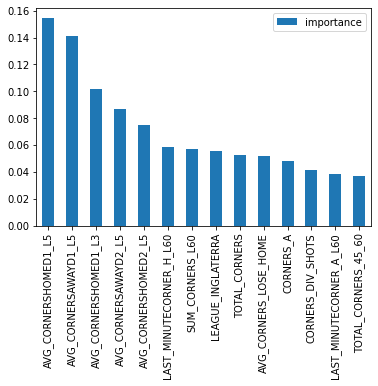

In [31]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [32]:
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 143,  917],
       [  51, 1536]])

In [33]:
cm[0][0]/(cm[1][0]+cm[0][0])

0.7371134020618557

In [34]:
(cm[0][0]+cm[1][0])/len(y_test)*100

7.329051756705704

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [35]:
y_pred = model.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred)
cm

array([[ 24, 100],
       [  3, 178]])

In [36]:
cm[0][0]/(cm[1][0]+cm[0][0])

0.8888888888888888

In [37]:
(cm[0][0]+cm[1][0])/len(y_validation)*100

8.852459016393443

## FINAL VALIDATION - NOVEMBER 2021

In [38]:
y_pred = model.predict(X_validation_november)
cm = confusion_matrix(y_validation_november, y_pred)
cm

array([[10, 70],
       [ 1, 99]])

In [39]:
cm[0][0]/(cm[1][0]+cm[0][0])

0.9090909090909091

In [40]:
(cm[0][0]+cm[1][0])/len(y_validation_november)*100

6.111111111111111

In [22]:
#umbral --> 0.58; Condition --> TOTAL_CORNERS > 3
import pickle
file_name = "model_under3_60.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [69]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [70]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 1 if x>0.6 else 0)

In [71]:
output[output.PROB_CORNERS==1]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
1,nsYoAO57,0,5,1,6,1
2,p0AwSvlE,0,4,5,9,1
3,My8ONsz7,0,10,7,17,1
4,G2atNzD8,1,7,5,12,1
5,CUhkLEsL,0,2,7,9,1
...,...,...,...,...,...,...
85,xI3tKroU,1,4,5,9,1
86,lG5l5XHe,1,2,2,4,1
88,EFCLO6Wb,1,6,2,8,1
89,445YL4GH,1,5,1,6,1
